<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Modulo_3/Aula_2_primeiras_previsoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o conteúdo anterior:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.ticker as ticker

In [2]:
## df_esp = estado de são paulo
## df_sp = cidade de são paulo

df_esp = pd.read_csv("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/dados_covid_sp.zip?raw=true", compression = "zip", sep = ";")

df_esp.loc[:,"datahora"] = pd.to_datetime(df_esp.loc[:,"datahora"], format = "%Y-%m-%d")

df_sp = df_esp.query("nome_munic == 'São Paulo'")

mpl.rcParams["font.size"] = 18

In [3]:
df = pd.DataFrame()

In [4]:
df.loc[:,"ds"] = df_sp.loc[:,"datahora"]
df.loc[:,"y"] = df_sp.loc[:,"casos_novos"]

df.head()

,ds,y
562,2020-02-25,0
1207,2020-02-26,0
1852,2020-02-27,0
2497,2020-02-28,1
3142,2020-02-29,0


In [5]:
from fbprophet import Prophet

In [6]:
m1 = Prophet()
m1

In [7]:
m1.fit(df) # sintaxe de como fazer fitting de modelos no python

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Sazonalidades diária e anual desabilitadas. Mas será que há detecção de sazonalidade semanal?

In [8]:
df_futuro = m1.make_future_dataframe(periods = 30)

In [9]:
df_futuro

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29
...,...
468,2021-06-07
469,2021-06-08
470,2021-06-09
471,2021-06-10


In [10]:
previsao = m1.predict(df_futuro) # dataframe com resultados do fitting do modelo

In [11]:
previsao #yhat = estimativa

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-114.303728,-845.529350,1486.640728,-114.303728,-114.303728,500.316952,500.316952,500.316952,500.316952,500.316952,500.316952,0.0,0.0,0.0,386.013224
1,2020-02-26,-96.932780,-767.103151,1653.451507,-96.932780,-96.932780,554.767711,554.767711,554.767711,554.767711,554.767711,554.767711,0.0,0.0,0.0,457.834930
2,2020-02-27,-79.561833,-617.298518,1808.567538,-79.561833,-79.561833,650.710000,650.710000,650.710000,650.710000,650.710000,650.710000,0.0,0.0,0.0,571.148167
3,2020-02-28,-62.190885,-952.478183,1465.935869,-62.190885,-62.190885,368.442066,368.442066,368.442066,368.442066,368.442066,368.442066,0.0,0.0,0.0,306.251181
4,2020-02-29,-44.819937,-1229.921636,1081.934788,-44.819937,-44.819937,30.824737,30.824737,30.824737,30.824737,30.824737,30.824737,0.0,0.0,0.0,-13.995200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,2021-06-07,3442.913185,1179.588965,3455.752292,3395.718648,3484.301424,-1142.791655,-1142.791655,-1142.791655,-1142.791655,-1142.791655,-1142.791655,0.0,0.0,0.0,2300.121530
469,2021-06-08,3453.150756,2780.634307,5194.984780,3402.501938,3495.789665,500.316952,500.316952,500.316952,500.316952,500.316952,500.316952,0.0,0.0,0.0,3953.467707
470,2021-06-09,3463.388326,2821.197251,5160.045890,3408.720835,3508.549069,554.767711,554.767711,554.767711,554.767711,554.767711,554.767711,0.0,0.0,0.0,4018.156037
471,2021-06-10,3473.625896,2909.185816,5275.920855,3415.236060,3521.214932,650.710000,650.710000,650.710000,650.710000,650.710000,650.710000,0.0,0.0,0.0,4124.335896


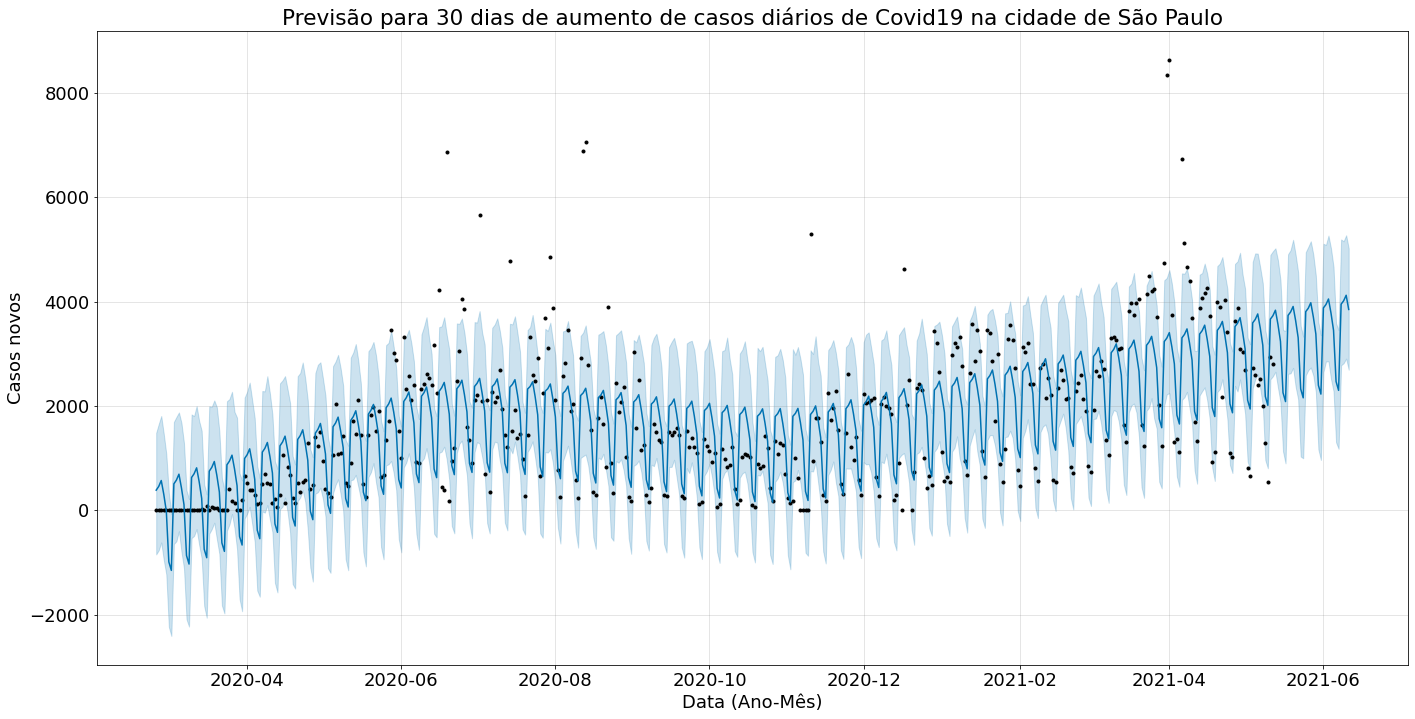

In [12]:
m1.plot(previsao, xlabel = "Data (Ano-Mês)", ylabel = "Casos novos", figsize = (20,10)); #; evita replica da figura
plt.title("Previsão para 30 dias de aumento de casos diários de Covid19 na cidade de São Paulo")
plt.show()

Divisão de dados de treino e teste (em aula o Alan re-rodou o dataframe lá em cima, mas eu preferi deixar separadinho aqui embaixo):

In [13]:
df2 = pd.DataFrame()

In [14]:
df2.loc[:,"ds"] = df_sp.loc[:,"datahora"][:400]
df2.loc[:,"y"] = df_sp.loc[:,"casos_novos"][:400]

In [15]:
m2 = Prophet()

In [16]:
m2.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
df_futuro2 = m2.make_future_dataframe(periods = 43) # 43 dias não analisados

In [18]:
df_futuro2

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29
...,...
438,2021-05-08
439,2021-05-09
440,2021-05-10
441,2021-05-11


In [19]:
previsao2 = m2.predict(df_futuro2)

In [20]:
previsao2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
438,2021-05-08,3197.437397,2275.730835,4332.198935,3111.381036,3284.050577,59.114795,59.114795,59.114795,59.114795,59.114795,59.114795,0.0,0.0,0.0,3256.552192
439,2021-05-09,3208.463516,1262.589389,3416.700366,3115.709597,3298.286037,-868.181375,-868.181375,-868.181375,-868.181375,-868.181375,-868.181375,0.0,0.0,0.0,2340.282141
440,2021-05-10,3219.489634,1128.847790,3270.110590,3122.750357,3313.105605,-1042.354250,-1042.354250,-1042.354250,-1042.354250,-1042.354250,-1042.354250,0.0,0.0,0.0,2177.135384
441,2021-05-11,3230.515753,2653.998694,4791.059292,3129.653367,3328.788466,457.699352,457.699352,457.699352,457.699352,457.699352,457.699352,0.0,0.0,0.0,3688.215105
442,2021-05-12,3241.541871,2586.188632,4856.813522,3136.029577,3342.384999,456.859942,456.859942,456.859942,456.859942,456.859942,456.859942,0.0,0.0,0.0,3698.401813


In [21]:
df2_teste = pd.DataFrame()
df2_teste.loc[:,"ds"] = df_sp.loc[:,"datahora"][400:]
df2_teste.loc[:,"y"] = df_sp.loc[:,"casos_novos"][400:]

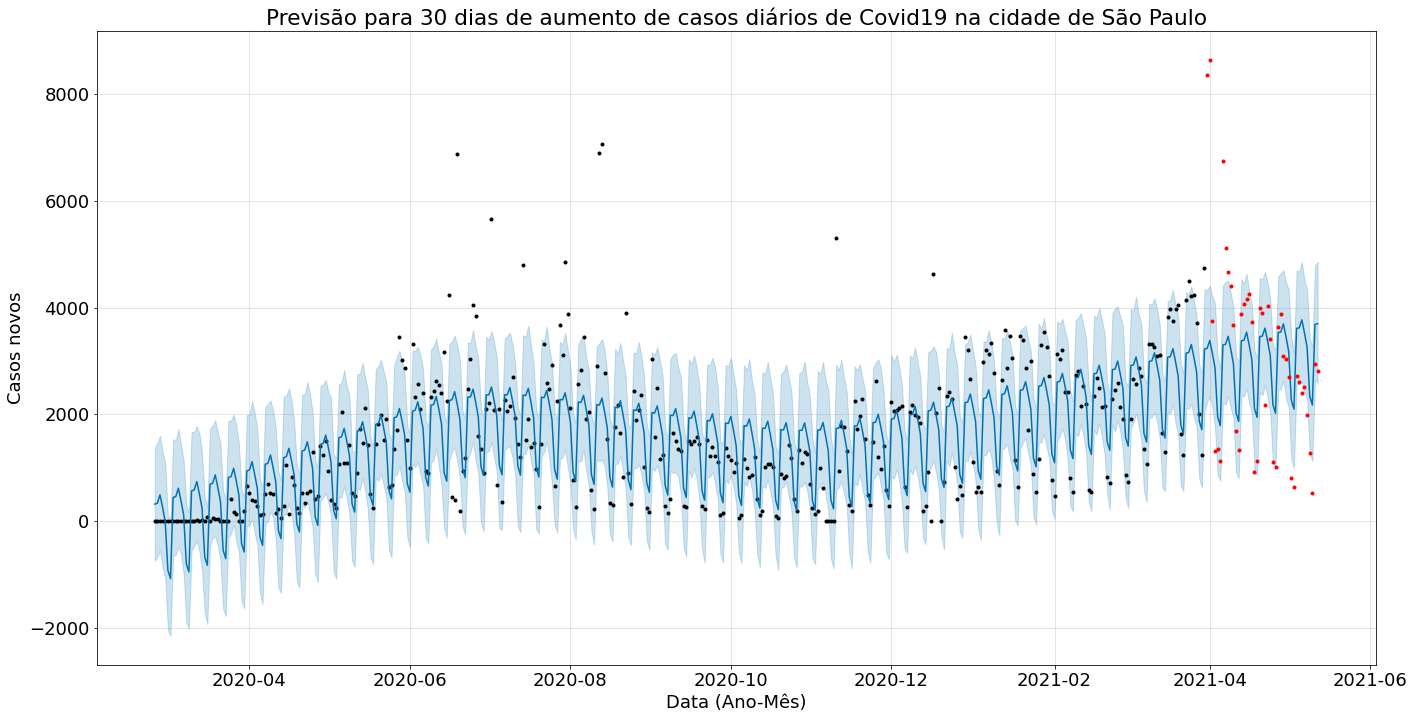

In [22]:
m2.plot(previsao2, xlabel = "Data (Ano-Mês)", ylabel = "Casos novos", figsize = (20,10));
plt.plot(df2_teste.loc[:,"ds"], df2_teste.loc[:,"y"], ".r") # estudar o que é .r
plt.title("Previsão para 30 dias de aumento de casos diários de Covid19 na cidade de São Paulo")
plt.show()

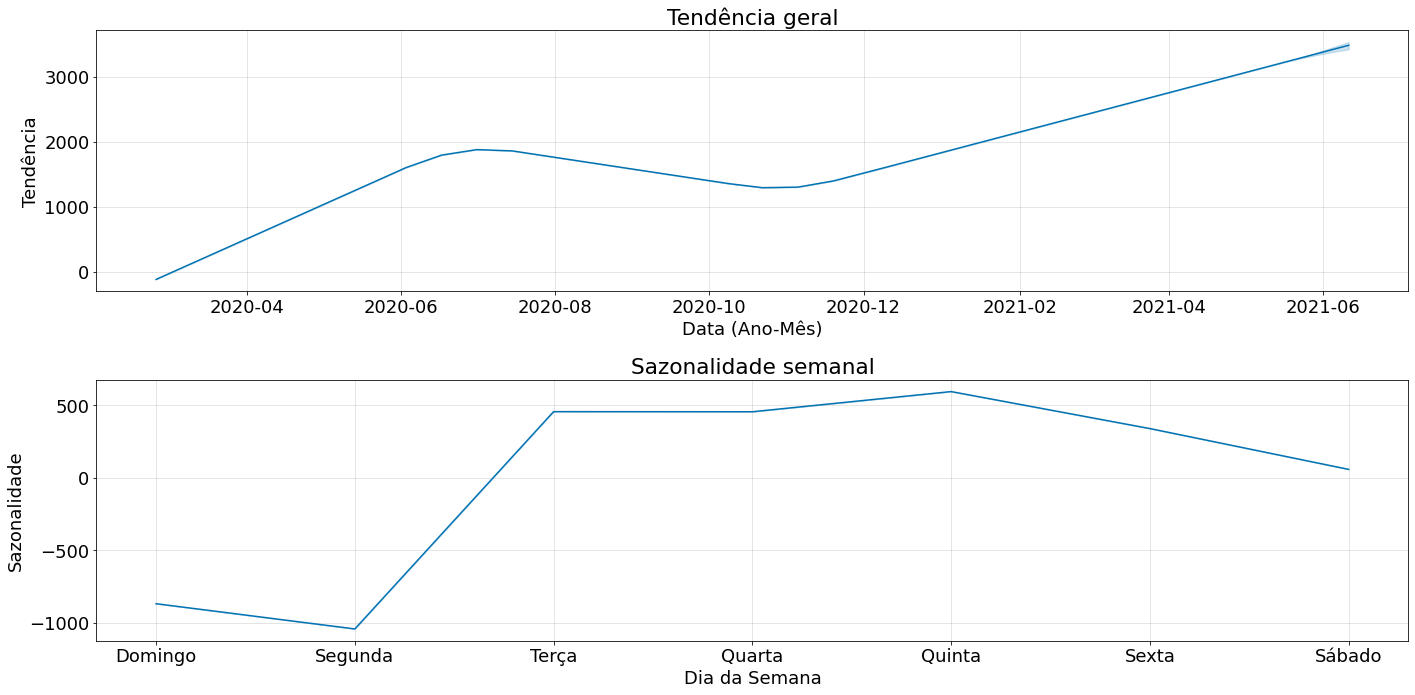

In [23]:
fig = m2.plot_components(previsao, figsize = (20,10))
ax = fig.get_axes()
ax[0].set_title("Tendência geral")
ax[0].set_ylabel("Tendência")
ax[0].set_xlabel("Data (Ano-Mês)")
ax[1].set_title("Sazonalidade semanal")
ax[1].set_ylabel("Sazonalidade")
ax[1].set_xticks(range(0,7))
ax[1].set_xticklabels(["Domingo", "Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado"])
ax[1].set_xlabel("Dia da Semana")
fig.tight_layout()
plt.show()

## Desafio 01 - Mudar os períodos de previsão

(Mantendo a divisão 70/30 de treino e teste):

In [24]:
print((473 * (1-30/100)))

331.09999999999997


In [25]:
df3 = pd.DataFrame()

df3.loc[:,"ds"] = df_sp.loc[:,"datahora"][:331]
df3.loc[:,"y"] = df_sp.loc[:,"casos_novos"][:331]

In [26]:
df3_teste = pd.DataFrame()
df3_teste.loc[:,"ds"] = df_sp.loc[:,"datahora"][331:]
df3_teste.loc[:,"y"] = df_sp.loc[:,"casos_novos"][331:]

In [27]:
m3 = Prophet()

In [28]:
m3.fit(df3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
df_f60 = m3.make_future_dataframe(periods = 60)
df_f90 = m3.make_future_dataframe(periods = 90)
df_f120 = m3.make_future_dataframe(periods = 120)
df_f180 = m3.make_future_dataframe(periods = 180)
df_f240 = m3.make_future_dataframe(periods = 240)
df_f365 = m3.make_future_dataframe(periods = 365)

In [30]:
prev60 = m3.predict(df_f60)
prev90 = m3.predict(df_f90)
prev120 = m3.predict(df_f120)
prev180 = m3.predict(df_f180)
prev240 = m3.predict(df_f240)
prev365 = m3.predict(df_f365)

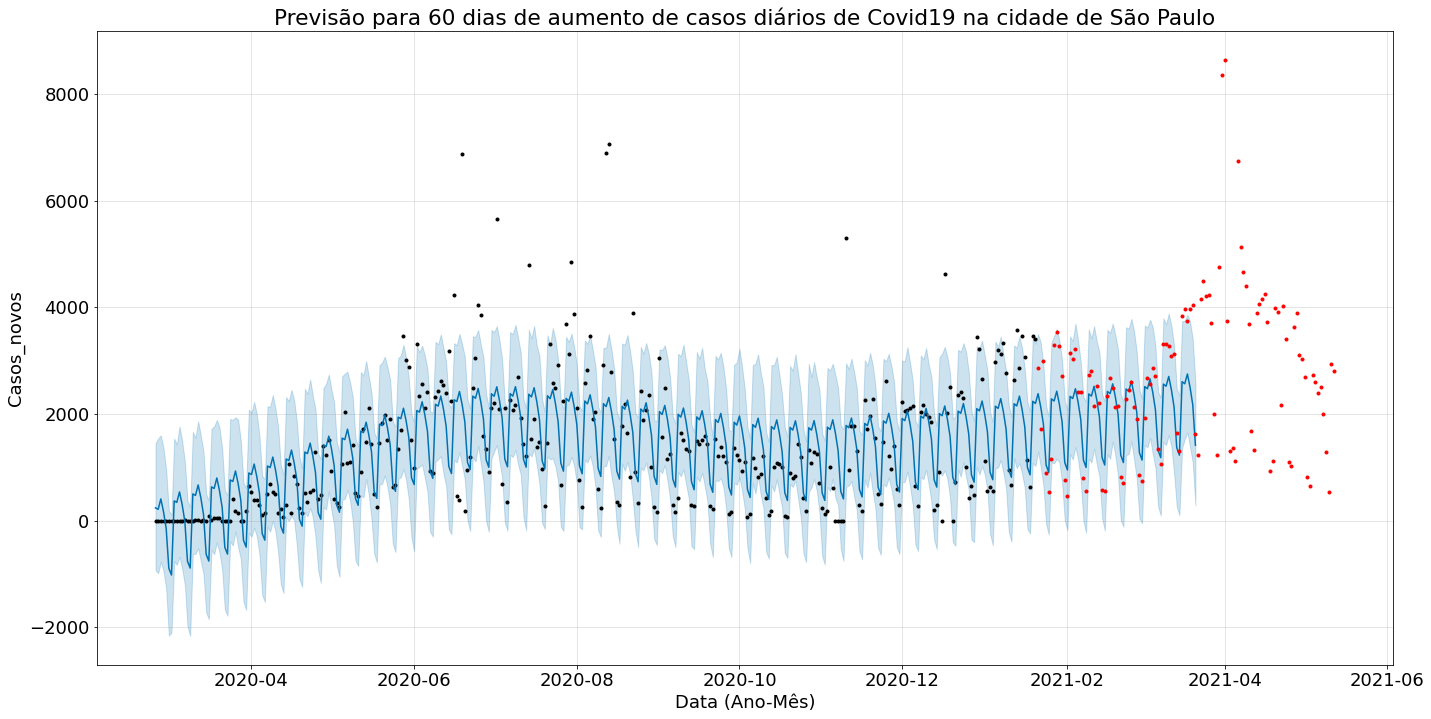

In [31]:
m3.plot(prev60, xlabel = "Data (Ano-Mês)", ylabel = "Casos_novos", figsize = (20,10));
plt.plot(df3_teste.loc[:,"ds"], df3_teste.loc[:,"y"], ".r")
plt.title("Previsão para 60 dias de aumento de casos diários de Covid19 na cidade de São Paulo")
plt.show()

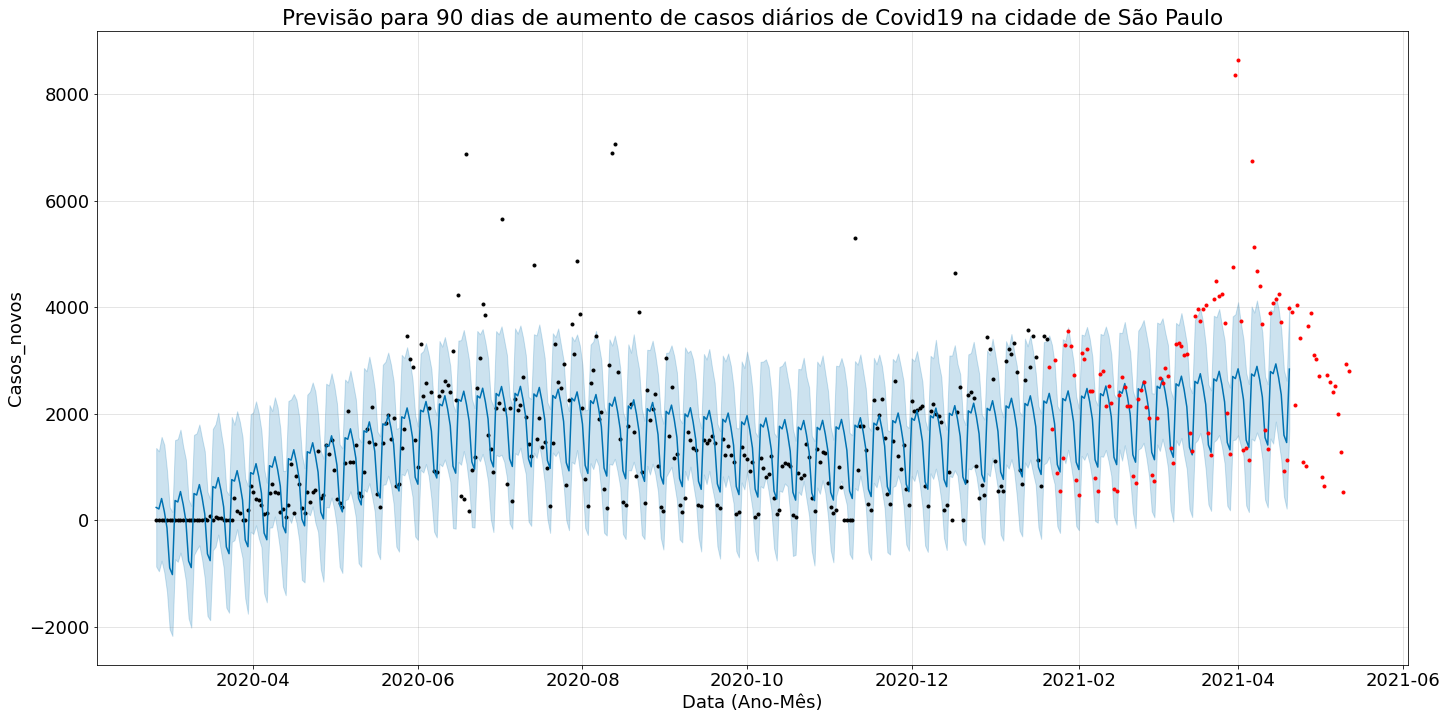

In [32]:
m3.plot(prev90, xlabel = "Data (Ano-Mês)", ylabel = "Casos_novos", figsize = (20,10));
plt.plot(df3_teste.loc[:,"ds"], df3_teste.loc[:,"y"], ".r")
plt.title("Previsão para 90 dias de aumento de casos diários de Covid19 na cidade de São Paulo")
plt.show()

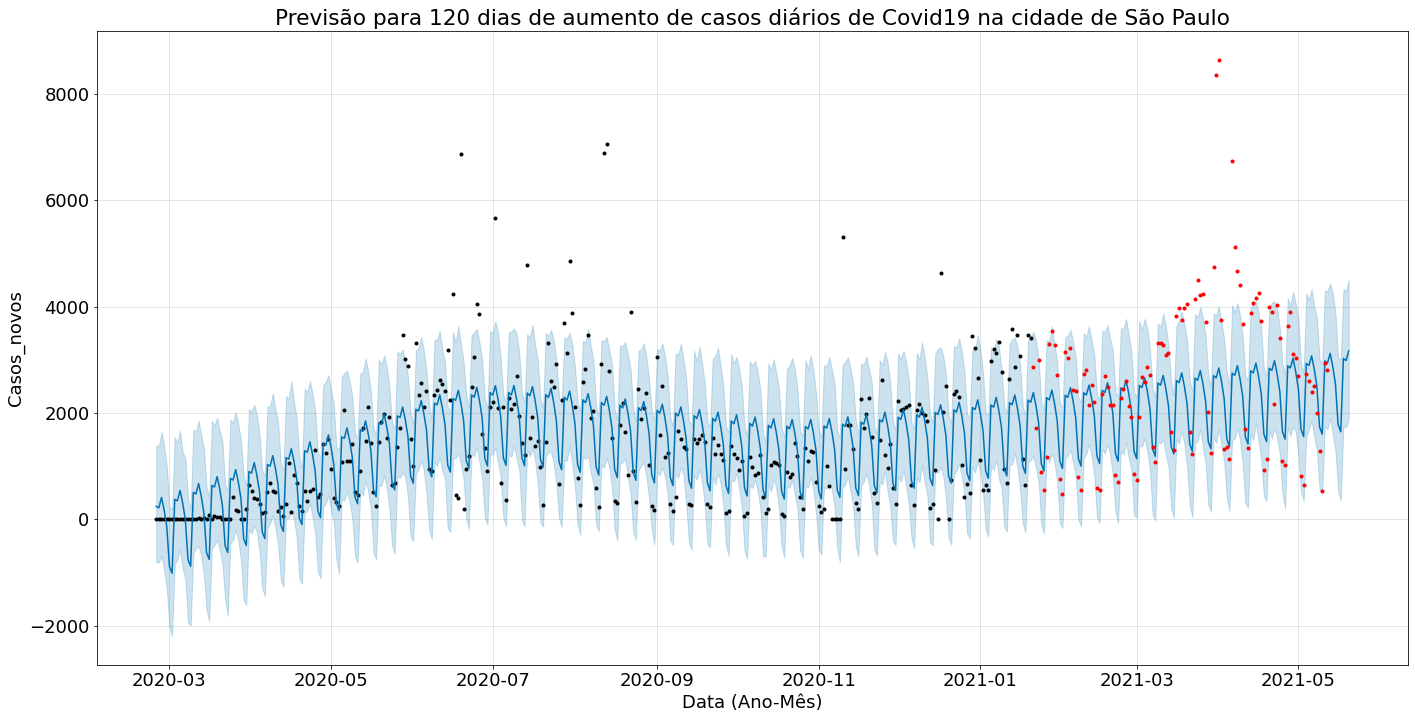

In [33]:
m3.plot(prev120, xlabel = "Data (Ano-Mês)", ylabel = "Casos_novos", figsize = (20,10));
plt.plot(df3_teste.loc[:,"ds"], df3_teste.loc[:,"y"], ".r")
plt.title("Previsão para 120 dias de aumento de casos diários de Covid19 na cidade de São Paulo")
plt.show()

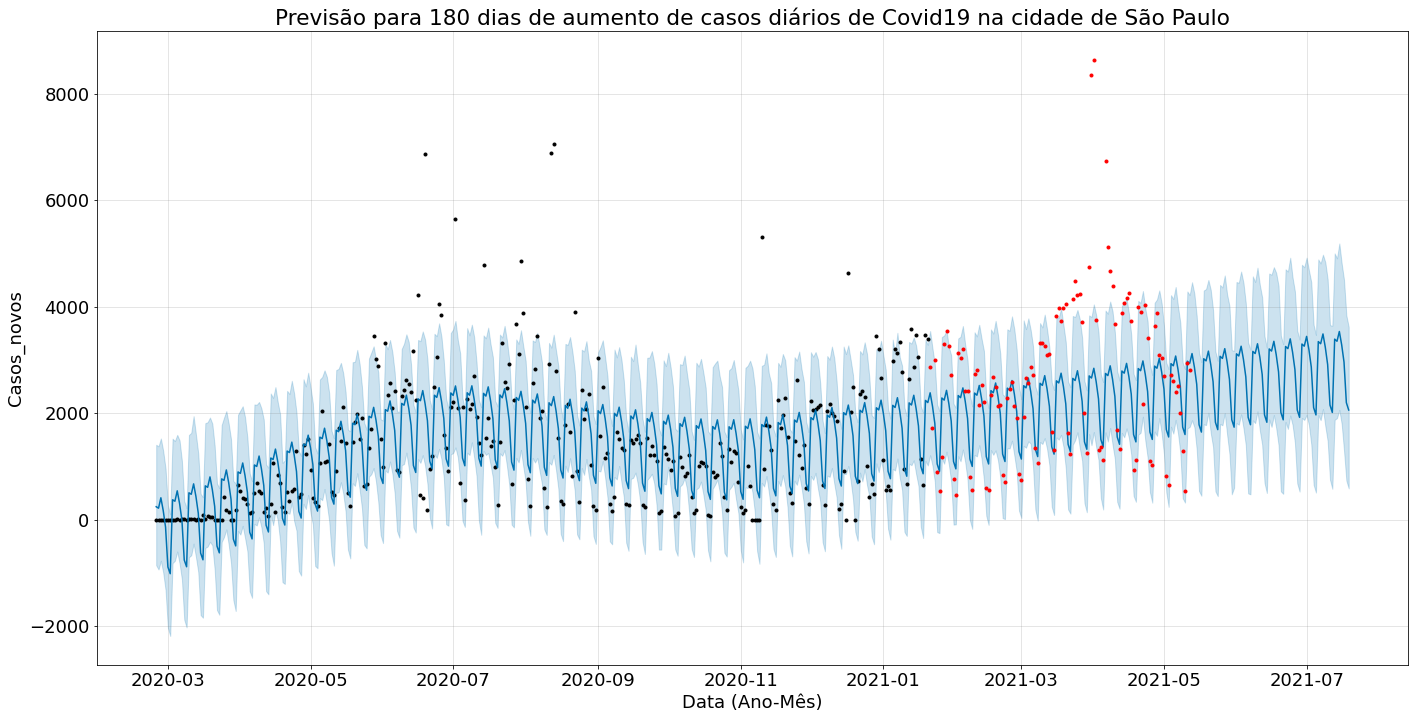

In [34]:
m3.plot(prev180, xlabel = "Data (Ano-Mês)", ylabel = "Casos_novos", figsize = (20,10));
plt.plot(df3_teste.loc[:,"ds"], df3_teste.loc[:,"y"], ".r")
plt.title("Previsão para 180 dias de aumento de casos diários de Covid19 na cidade de São Paulo")
plt.show()

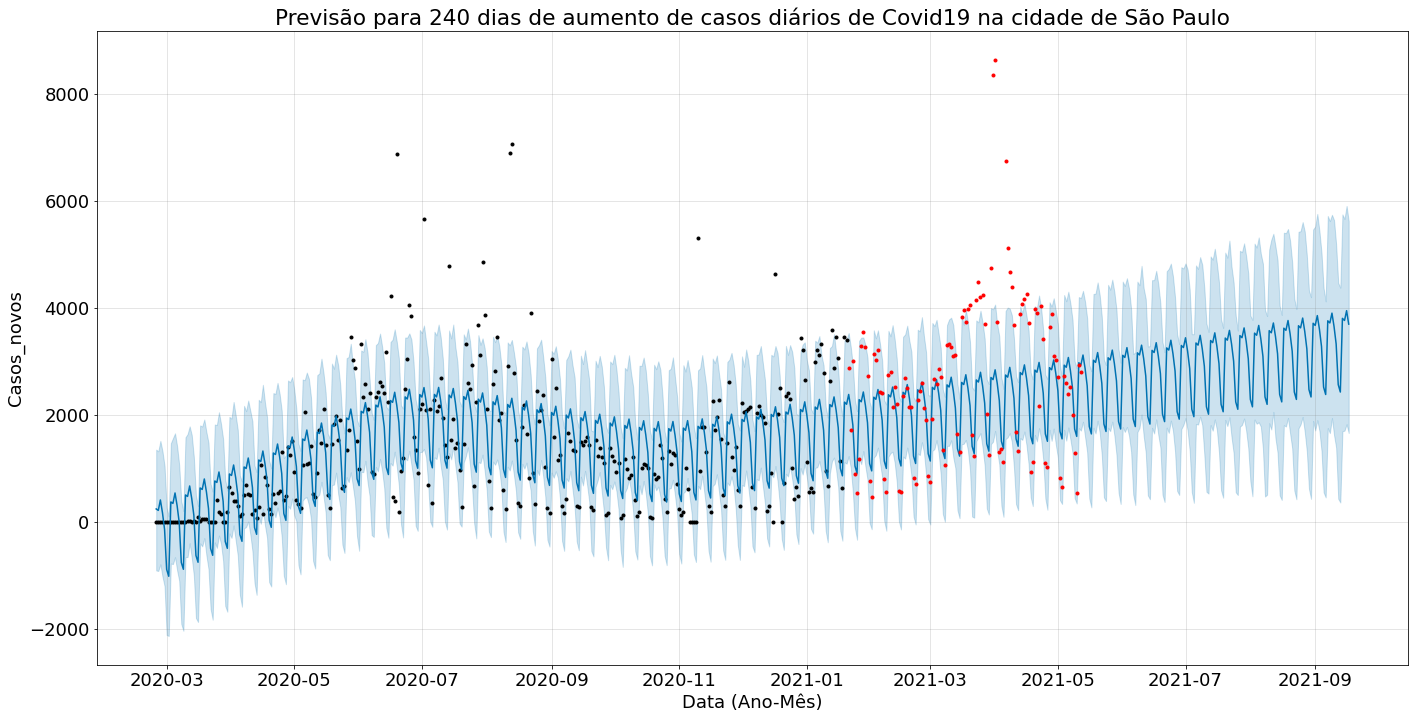

In [35]:
m3.plot(prev240, xlabel = "Data (Ano-Mês)", ylabel = "Casos_novos", figsize = (20,10));
plt.plot(df3_teste.loc[:,"ds"], df3_teste.loc[:,"y"], ".r")
plt.title("Previsão para 240 dias de aumento de casos diários de Covid19 na cidade de São Paulo")
plt.show()

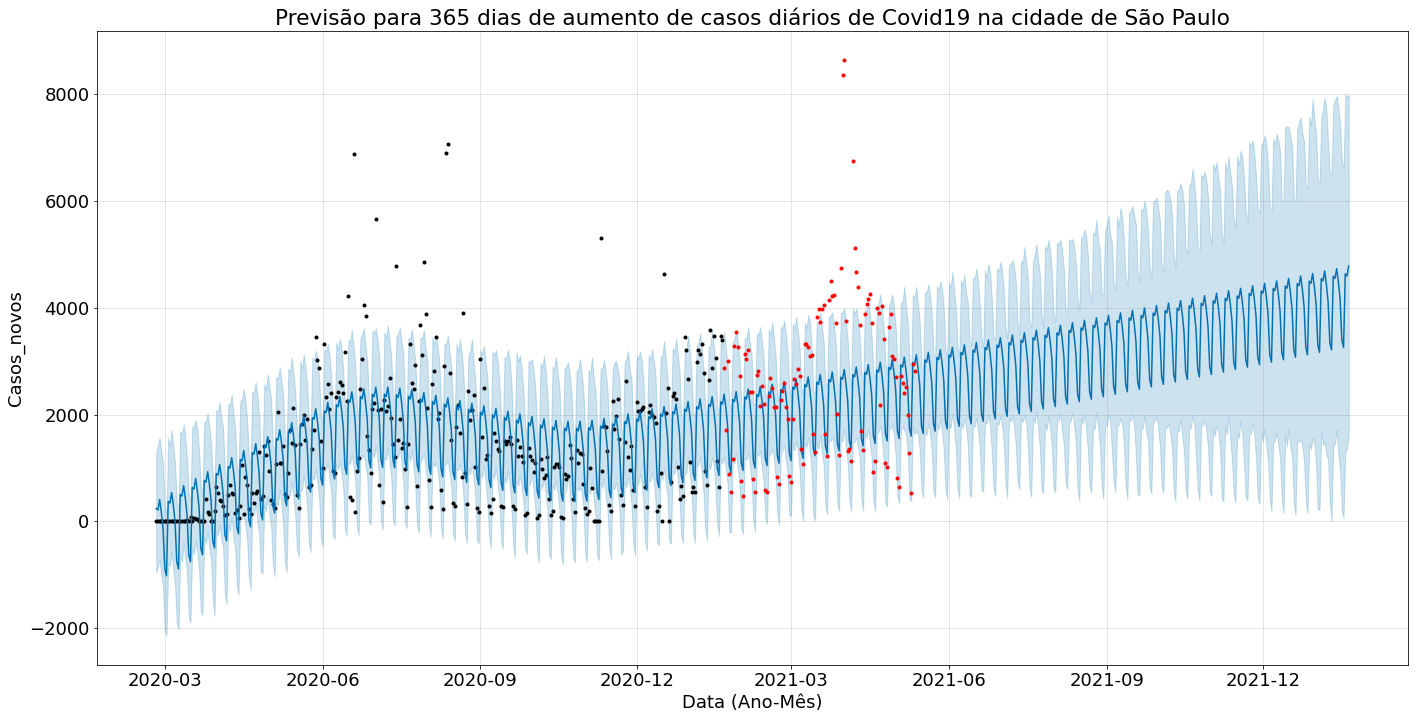

In [36]:
m3.plot(prev365, xlabel = "Data (Ano-Mês)", ylabel = "Casos_novos", figsize = (20,10));
plt.plot(df3_teste.loc[:,"ds"], df3_teste.loc[:,"y"], ".r")
plt.title("Previsão para 365 dias de aumento de casos diários de Covid19 na cidade de São Paulo")
plt.show()

## Conclusões:

Adicionando mais dias, podemos ver que o prophet está detectando e gerando uma tendência de aumento nos valores. Isso é interessante porque:

- Aqui no mundo real, sabemos que houve uma redução, mesmo que pequena, no número de casos nos meses de Abril e Maio;
- Porém, o modelo não pareceu detectar essa queda. Provavelmente porque o aumento anterior do final de 2020 para o começo de 2021 foi numa escala bastante grande (segunda onda);
- Devido a esse padrão, o modelo prevê um aumento no número de casos para o futuro. Porém, podemos ver que, quanto mais "pra frente" o modelo tenta estimar, maior a incerteza. Nesse ritmo, a partir de ~ 240 dias começa a ficar muito difícil gerar previsões robustas;
- Coincidentemente (ou não), a previsão de aumento para os próximos 30 - 60 dias parece se confirmar aqui no mundo real, sabemos que o número de casos em Junho está voltando a crescer e já estamos enfrentando o que pode ser chamado de "terceira onda".

Claro que, nosso modelo ainda é bastante simples, n fatores sobre a natureza dinâmica de pandemias não estão incluidas, mas caso os índices de isolamento continuem baixos, vacinação ainda muito lenta e recusa do uso de máscara continuarem, poderemos entrar nos cenários de aumento previstos pelo modelo.

### Será que o modelo prevê a queda que ocorreu no segundo semestre de 2020?

A título de curiosidade, resolvi examinar se o modelo detecta a tendência de querda que houve de fato na segunda metade de 2020. Claro que não é uma aplicação usual, tentar prever algo que já aconteceu, mas podemos brincar um pouco para testar as possibilidades do modelo.

In [37]:
df_sp.iloc[0,]
df_sp.iloc[189,]

nome_munic                 São Paulo
codigo_ibge                  3550308
dia                                1
mes                                9
datahora         2020-09-01 00:00:00
casos                         260991
casos_novos                     3042
casos_pc                2,198808e+03
casos_mm7d              1545,7142857
obitos                         11478
obitos_novos                      70
obitos_pc               9,670033e+01
obitos_mm7d               48,1428571
letalidade              0,0439785280
nome_ra              RM de São Paulo
cod_ra                            10
nome_drs            Grande São Paulo
cod_drs                           10
pop                         11869660
pop_60                       1853286
area                          152111
map_leg                        >5000
map_leg_s                          1
latitude                    -23,5329
longitude                   -46,6395
semana_epidem                     36
Name: 122467, dtype: object

In [38]:
df4 = pd.DataFrame()

df4.loc[:,"ds"] = df_sp.loc[:,"datahora"][:189]
df4.loc[:,"y"] = df_sp.loc[:,"casos_novos"][:189]

df4.tail()

,ds,y
119242,2020-08-27,2083
119887,2020-08-28,2365
120532,2020-08-29,1017
121177,2020-08-30,250
121822,2020-08-31,171


In [39]:
df4_teste = pd.DataFrame()
df4_teste.loc[:,"ds"] = df_sp.loc[:,"datahora"][189:]
df4_teste.loc[:,"y"] = df_sp.loc[:,"casos_novos"][189:]
df4_teste.head()

,ds,y
122467,2020-09-01,3042
123112,2020-09-02,1579
123757,2020-09-03,2496
124402,2020-09-04,1166
125047,2020-09-05,1245


In [40]:
m4 = Prophet()
m4.fit(df4)
df_f120 = m4.make_future_dataframe(periods = 120)
prev120 = m4.predict(df_f120)  

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


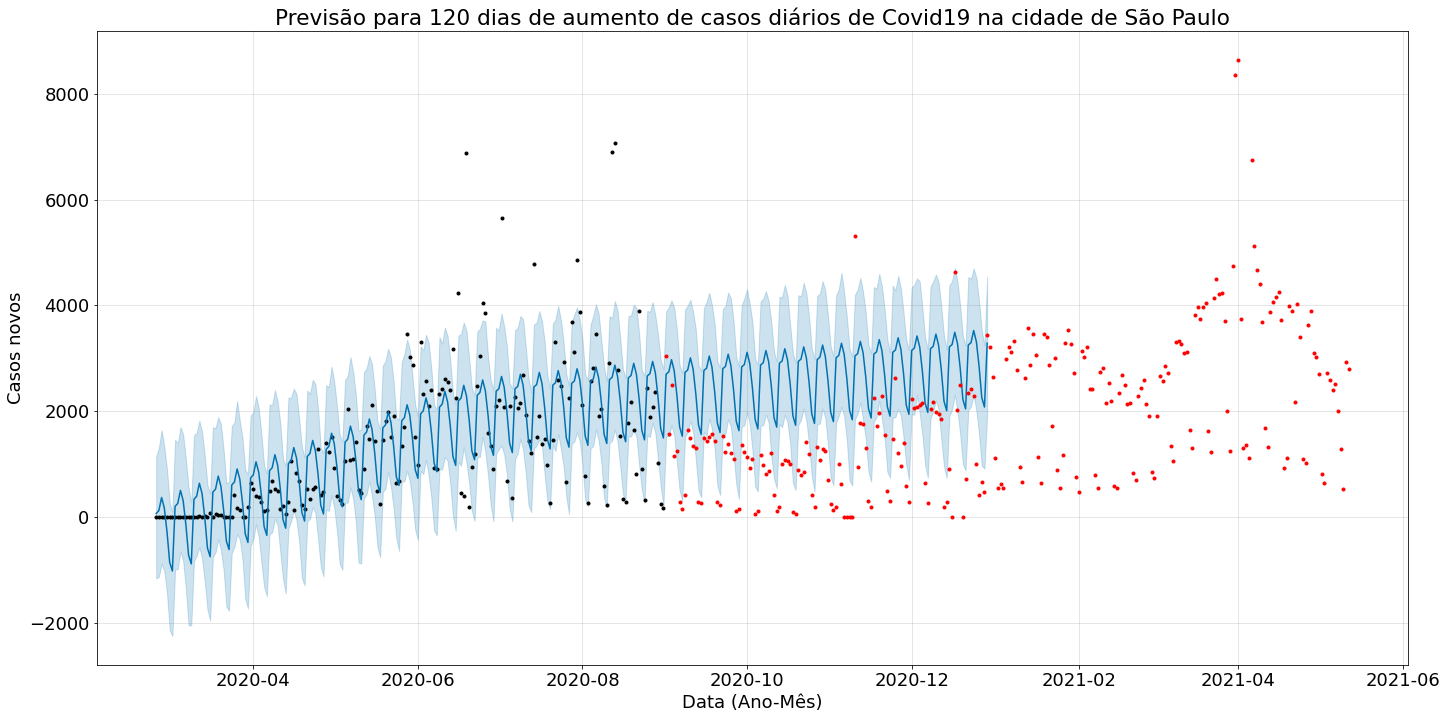

In [41]:
m4.plot(prev120, xlabel = "Data (Ano-Mês)", ylabel = "Casos novos", figsize = (20,10));
plt.plot(df4_teste.loc[:,"ds"], df4_teste.loc[:,"y"], ".r")
plt.title("Previsão para 120 dias de aumento de casos diários de Covid19 na cidade de São Paulo")
plt.show()

Parece que não. E se eu pegasse até o final de Novembro, quando definitivamente não havia tendência de aumento? A segunda onda começou por volta de Dezembro.

In [42]:
df_sp.iloc[0,]
df_sp.iloc[279,]

nome_munic                 São Paulo
codigo_ibge                  3550308
dia                               30
mes                               11
datahora         2020-11-30 00:00:00
casos                         349912
casos_novos                      290
casos_pc                2,947953e+03
casos_mm7d              1224,5714286
obitos                         14401
obitos_novos                       7
obitos_pc               1,213261e+02
obitos_mm7d               31,7142857
letalidade              0,0411560621
nome_ra              RM de São Paulo
cod_ra                            10
nome_drs            Grande São Paulo
cod_drs                           10
pop                         11869660
pop_60                       1853286
area                          152111
map_leg                        >5000
map_leg_s                          1
latitude                    -23,5329
longitude                   -46,6395
semana_epidem                     49
Name: 180517, dtype: object

In [43]:
df5 = pd.DataFrame()

df5.loc[:,"ds"] = df_sp.loc[:,"datahora"][:280]
df5.loc[:,"y"] = df_sp.loc[:,"casos_novos"][:280]

df5.tail()

,ds,y
177937,2020-11-26,1210
178582,2020-11-27,970
179227,2020-11-28,1408
179872,2020-11-29,589
180517,2020-11-30,290


In [44]:
df5_teste = pd.DataFrame()

df5_teste.loc[:,"ds"] = df_sp.loc[:,"datahora"][280:]
df5_teste.loc[:,"y"] = df_sp.loc[:,"casos_novos"][280:]

In [45]:
m5 = Prophet()
m5.fit(df5)
df_f120 = m5.make_future_dataframe(periods = 120)
df_f240 = m5.make_future_dataframe(periods = 240)
prev120 = m5.predict(df_f120)
prev240 = m5.predict(df_f240)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


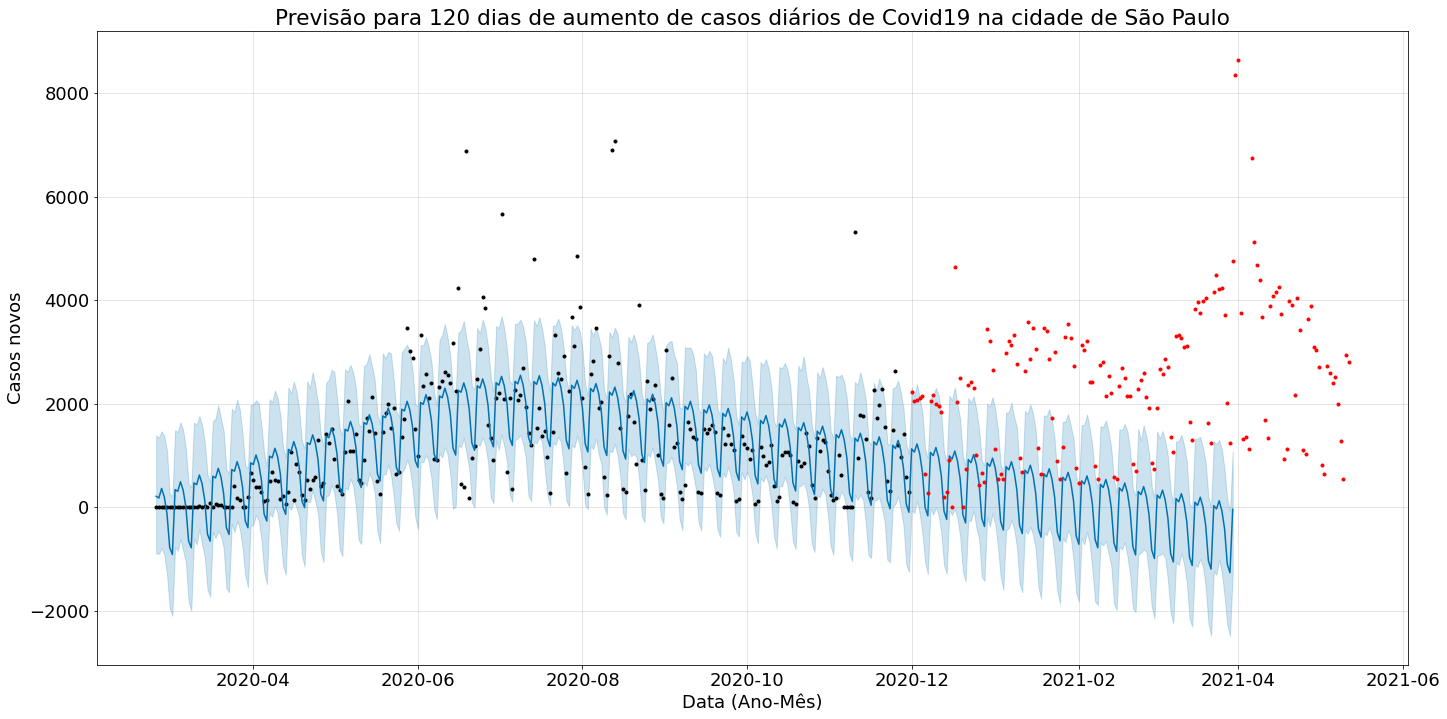

In [46]:
m5.plot(prev120, xlabel = "Data (Ano-Mês)", ylabel = "Casos novos", figsize = (20,10));
plt.plot(df5_teste.loc[:,"ds"], df5_teste.loc[:,"y"], ".r")
plt.title("Previsão para 120 dias de aumento de casos diários de Covid19 na cidade de São Paulo")
plt.show()

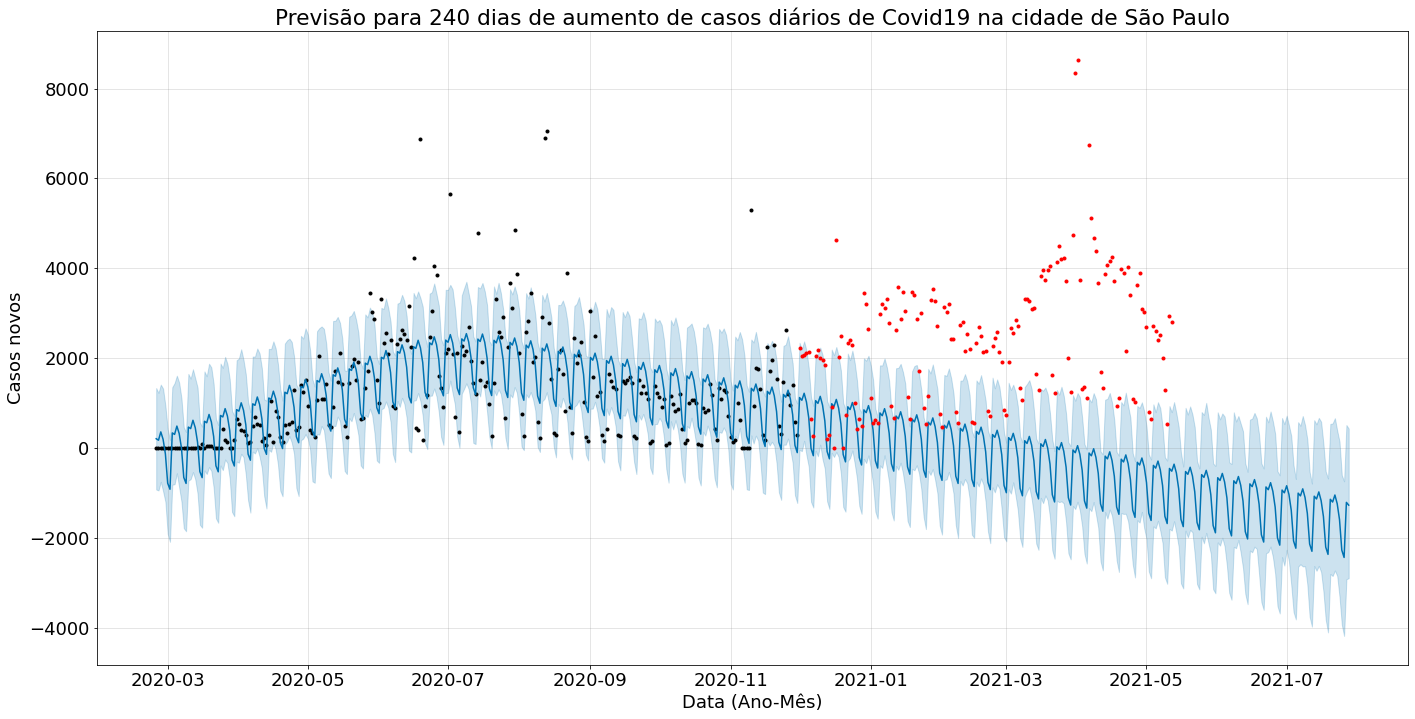

In [47]:
m5.plot(prev240, xlabel = "Data (Ano-Mês)", ylabel = "Casos novos", figsize = (20,10));
plt.plot(df5_teste.loc[:,"ds"], df5_teste.loc[:,"y"], ".r")
plt.title("Previsão para 240 dias de aumento de casos diários de Covid19 na cidade de São Paulo")
plt.show()

Opa, agora sim! Usando somente os dados até o final de Novembro, o modelo detectou uma tendência de queda. Claro que, estendendo muito, teríamos além da incerteza, estimativas de valores negativos, o que, claro, sabemos que não faz sentido. Deve haver alguma forma de "truncar" o modelo para não gerar valores negativos. 

Uma pena que não seguimos essa tendência entrando no ano de 2021...

## Desafio 02 - Explorar a documentação do prophet e melhorar os gráficos

Não parece haver muita dificuldade para alterar os parâmetros gráficos do prophet, é possível utilizar as ferramentas do matplotlib.pyplot mesmo:

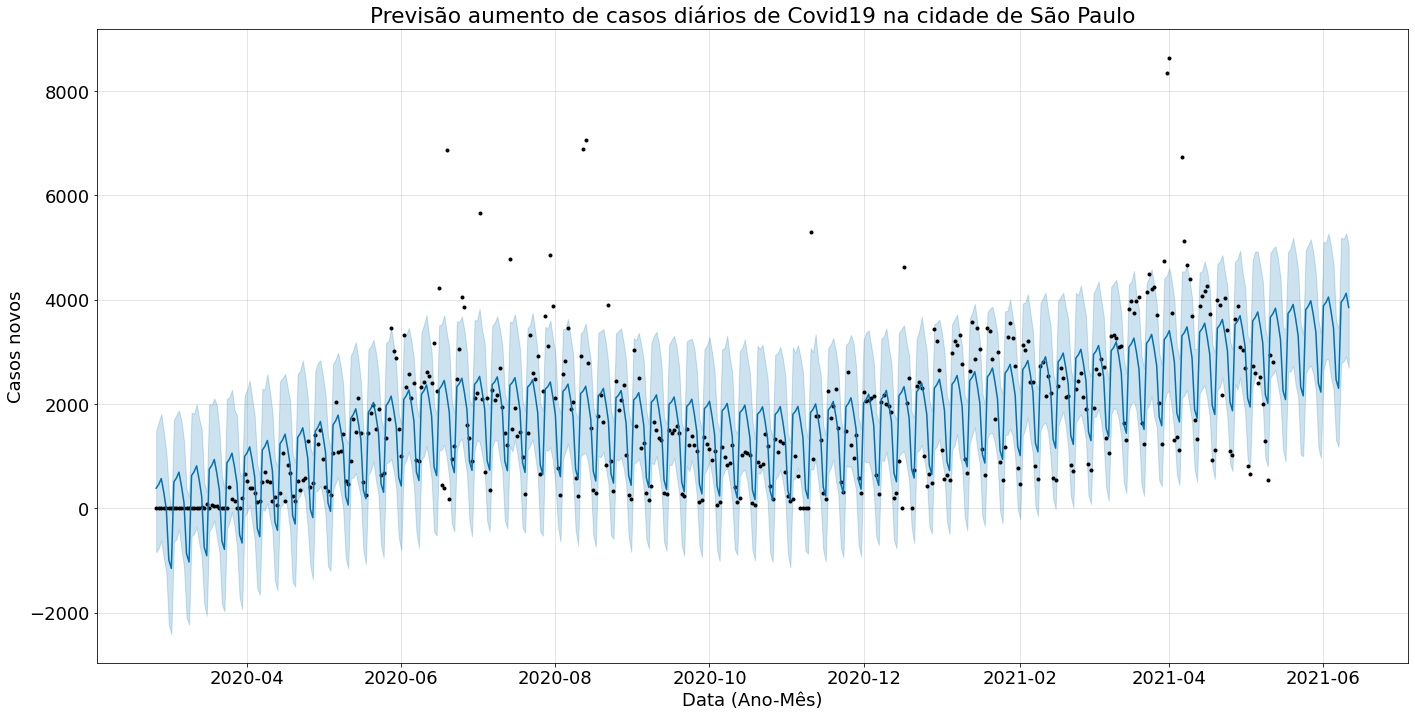

In [48]:
m1.plot(previsao, xlabel = "Data (Ano-Mês)", ylabel = "Casos novos", figsize = (20,10)); #; evita replica da figura
plt.title("Previsão aumento de casos diários de Covid19 na cidade de São Paulo")
plt.show()

O plot_component é um objeto de figura do matplotlib, portanto pode ser manipulado:

matplotlib.figure.Figure

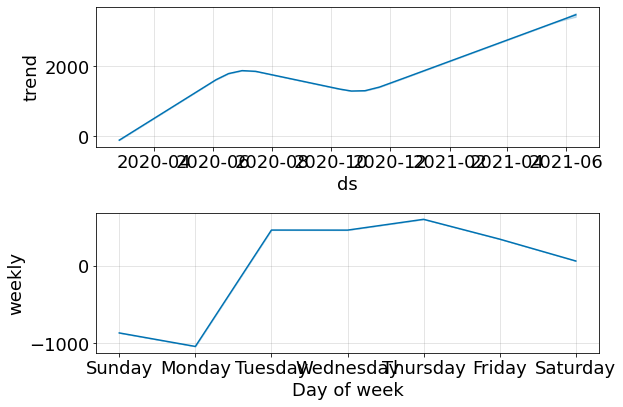

In [49]:
fig = m2.plot_components(previsao)
type(fig)

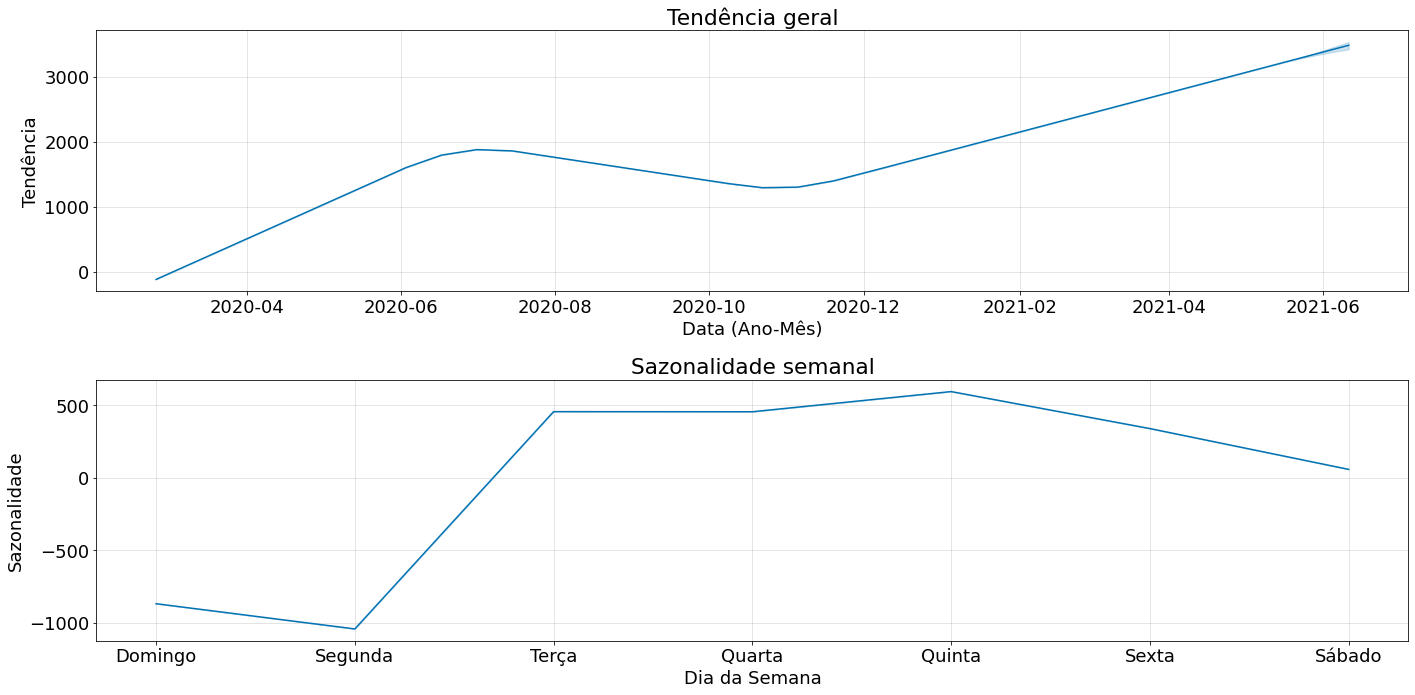

In [50]:
fig = m2.plot_components(previsao, figsize = (20,10))
ax = fig.get_axes()
ax[0].set_title("Tendência geral")
ax[0].set_ylabel("Tendência")
ax[0].set_xlabel("Data (Ano-Mês)")
ax[1].set_title("Sazonalidade semanal")
ax[1].set_ylabel("Sazonalidade")
ax[1].set_xticks(range(0,7))
ax[1].set_xticklabels(["Domingo", "Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado"])
ax[1].set_xlabel("Dia da Semana")
fig.tight_layout()
plt.show()

**Se você chegou até aqui, percebeu que eu fiz esse desafio recursivamente, entendi como fazê-lo ao final, e depois refiz os gráficos**

## Desafio 03 - Fazer todo o processo de previsão para o número de casos acumulados

Vou usar os 400 dias para manter a consistência com a aula:

In [51]:
df6 = pd.DataFrame()
df6.loc[:,"ds"] = df_sp.loc[:,"datahora"][:400]
df6.loc[:,"y"] = df_sp.loc[:,"casos"][:400]

df6_teste = pd.DataFrame()
df6_teste.loc[:,"ds"] = df_sp.loc[:,"datahora"][400:]
df6_teste.loc[:,"y"] = df_sp.loc[:,"casos"][400:]

m6 = Prophet()
m6.fit(df6)
df_f6 = m6.make_future_dataframe(periods = 103)
prev6 = m6.predict(df_f6)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


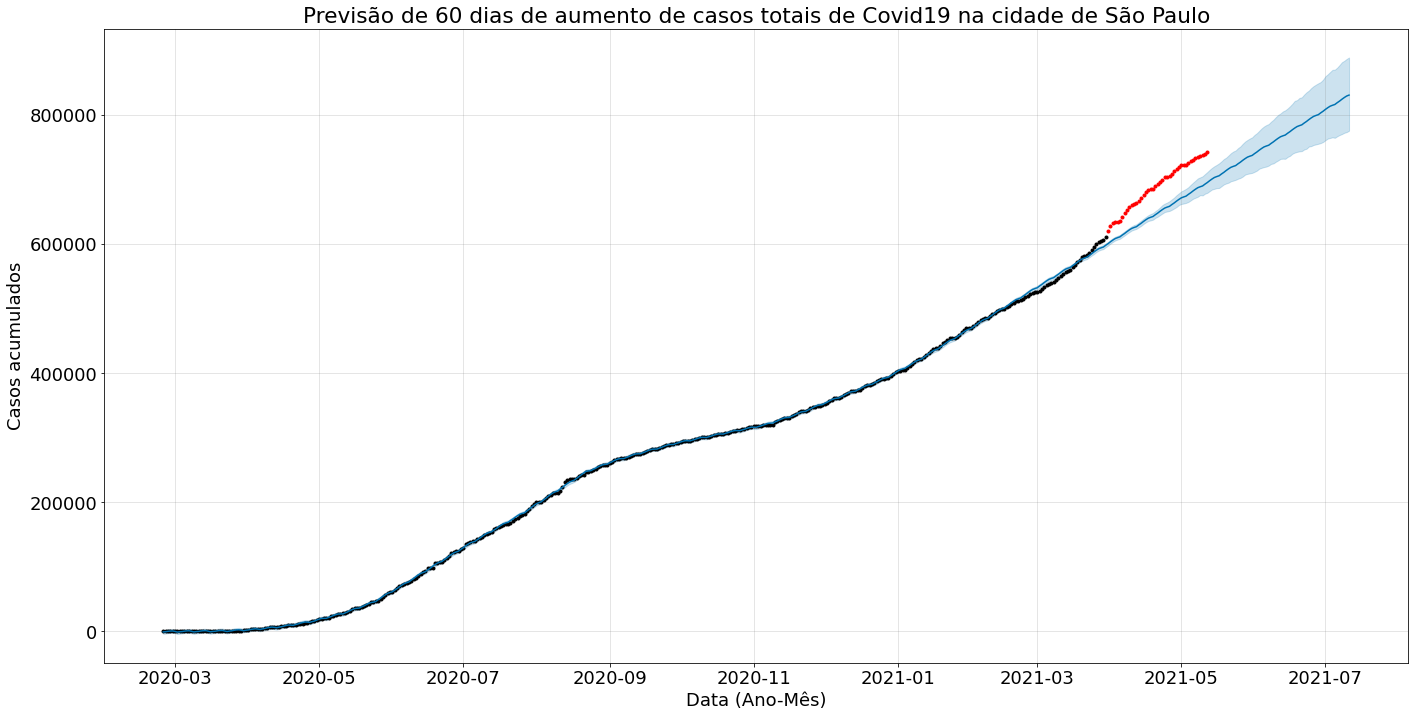

In [52]:
m6.plot(prev6, xlabel = "Data (Ano-Mês)", ylabel = "Casos acumulados", figsize = (20,10));
plt.plot(df6_teste.loc[:,"ds"], df6_teste.loc[:,"y"], ".r")
plt.title("Previsão de 60 dias de aumento de casos totais de Covid19 na cidade de São Paulo")
plt.show()

Perceba como infelizmente tivemos um aumento real maior do que o previsto pelo modelo.

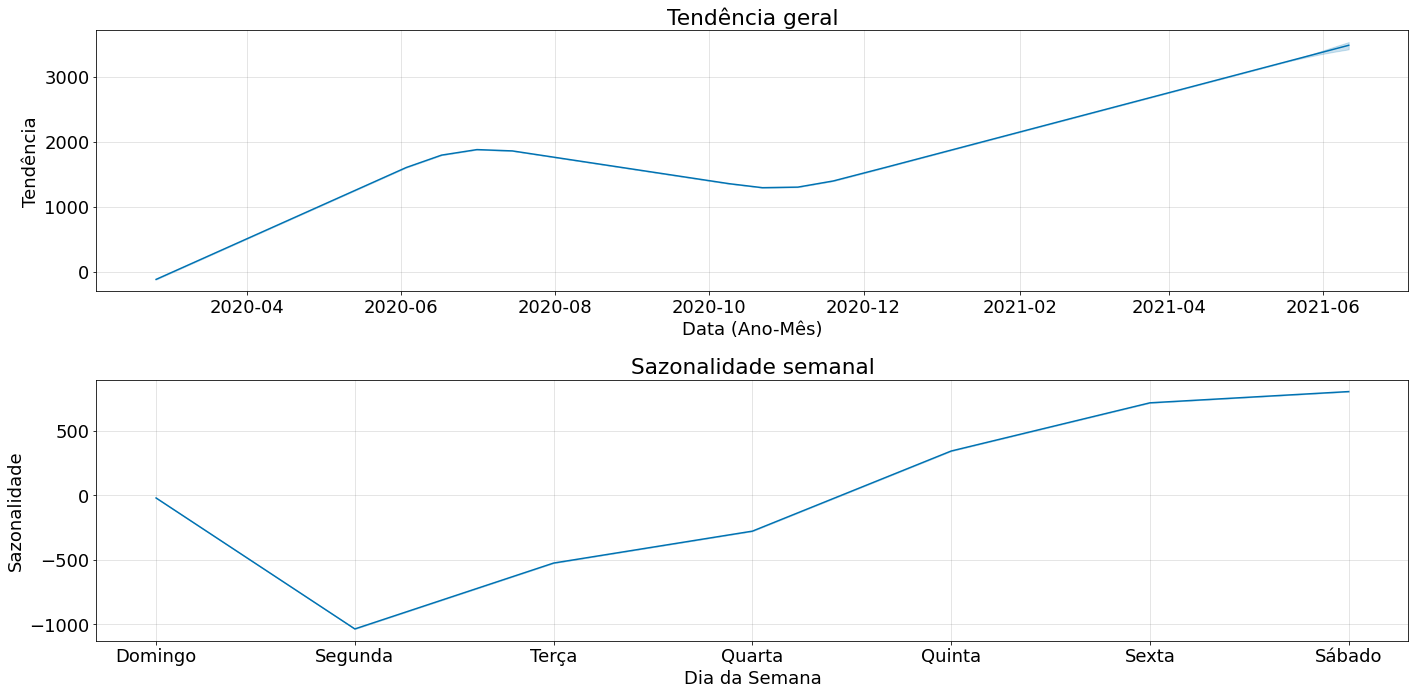

In [53]:
fig = m6.plot_components(previsao, figsize = (20,10))
ax = fig.get_axes()
ax[0].set_title("Tendência geral")
ax[0].set_ylabel("Tendência")
ax[0].set_xlabel("Data (Ano-Mês)")
ax[1].set_title("Sazonalidade semanal")
ax[1].set_ylabel("Sazonalidade")
ax[1].set_xticks(range(0,7))
ax[1].set_xticklabels(["Domingo", "Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado"])
ax[1].set_xlabel("Dia da Semana")
fig.tight_layout()
plt.show()